In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
def load_images(folder, img_size=124, limit=1000):
    data = []
    labels = []
    cat_count = 0
    dog_count = 0

    for filename in os.listdir(folder):
        if filename.startswith('cat') and cat_count < limit:
            label = 0
            cat_count += 1
        elif filename.startswith('dog') and dog_count < limit:
            label = 1
            dog_count += 1
        else:
            continue

        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        img = cv2.resize(img, (img_size, img_size))
        data.append(img.flatten())
        labels.append(label)

        if cat_count >= limit and dog_count >= limit:
            break

    return np.array(data), np.array(labels)


In [3]:
X, y = load_images(r'C:\Users\91998\OneDrive\Documents\MCA\PROJECT WORK\Prodigy Intership June-2025\Prodigy Task 03\train\train', img_size=124, limit=1000)


In [4]:
# Check label distribution
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Label counts:", dict(zip(unique, counts)))

Label counts: {0: 1000, 1: 1000}


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.545
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       200
           1       0.56      0.43      0.49       200

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.54       400
weighted avg       0.55      0.55      0.54       400



In [8]:
import matplotlib.pyplot as plt

In [9]:
def predict_image(img_path, model, scaler, img_size=124):
    # Read and preprocess image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image from path: {img_path}")
        return "Image not found"
    
    img_resized = cv2.resize(img, (img_size, img_size))
    img_flatten = img_resized.flatten().reshape(1, -1)

    # Scale image
    img_scaled = scaler.transform(img_flatten)

    # Predict
    prediction = model.predict(img_scaled)[0]
    label = 'Dog' if prediction == 1 else 'Cat'

    # Show the image with label
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    return label


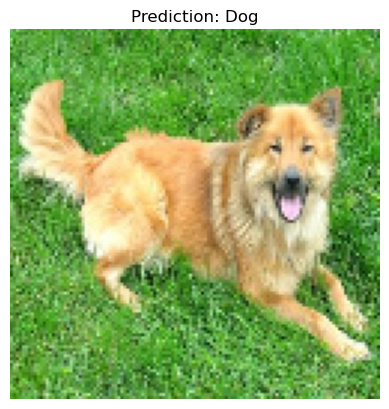

'Dog'

In [16]:
predict_image(
    r"C:\Users\91998\OneDrive\Documents\MCA\PROJECT WORK\Prodigy Intership June-2025\Prodigy Task 03\test\test\4.jpg",
    svm_model, scaler
)


In [11]:
import pickle

# Save model and scaler
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved to svm_model.pkl and scaler.pkl")
 

Model and scaler saved to svm_model.pkl and scaler.pkl


              precision    recall  f1-score   support

           0       0.53      0.62      0.57       200
           1       0.54      0.46      0.50       200

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.53       400
weighted avg       0.54      0.54      0.53       400



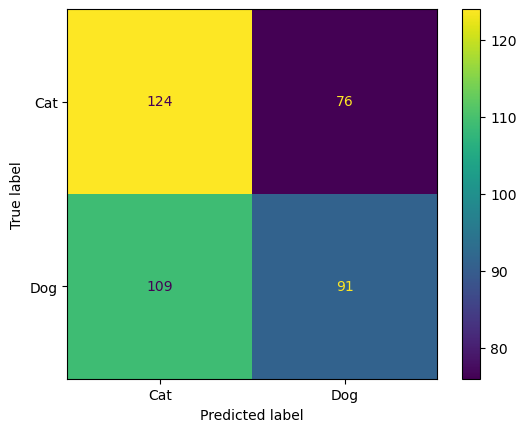

In [12]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load model
with open("svm_model.pkl", "rb") as f:
    model = pickle.load(f)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot()
plt.show()
